In [1]:
from kan import *
from pprint import pprint

In [2]:
TEST_N = 8

In [3]:
f = lambda x: torch.exp(torch.sin(torch.sin(x[:,[0]] + 2 * x[:, [0]]**2) + 0.5 * x[:, [0]]))
dataset = create_dataset(f, n_var=1)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

In [4]:
models = []

train loss: 2.41e-04 | test loss: 2.49e-04 | reg: 1.10e+01 : 100%|█| 100/100 [00:10<00:00,  9.40it/s
train loss: 1.04e-04 | test loss: 1.11e-04 | reg: 1.62e+01 : 100%|█| 100/100 [00:25<00:00,  3.98it/s
train loss: 1.62e-04 | test loss: 1.65e-04 | reg: 1.78e+01 : 100%|█| 100/100 [00:31<00:00,  3.22it/s
train loss: 2.03e-04 | test loss: 1.94e-04 | reg: 2.01e+01 : 100%|█| 100/100 [00:37<00:00,  2.64it/s
train loss: 1.02e-04 | test loss: 1.06e-04 | reg: 2.38e+01 : 100%|█| 100/100 [00:41<00:00,  2.41it/s
train loss: 1.11e-04 | test loss: 1.11e-04 | reg: 2.52e+01 : 100%|█| 100/100 [00:46<00:00,  2.13it/s
train loss: 1.08e-04 | test loss: 9.95e-05 | reg: 2.65e+01 : 100%|█| 100/100 [00:55<00:00,  1.82it/s


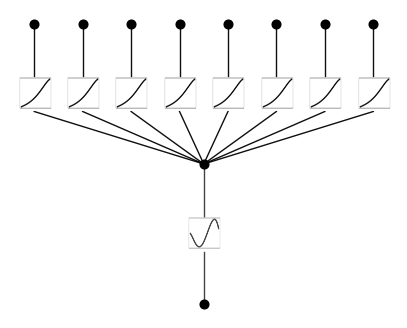

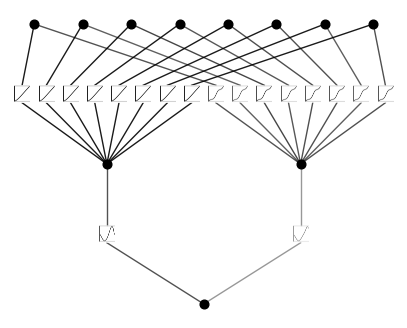

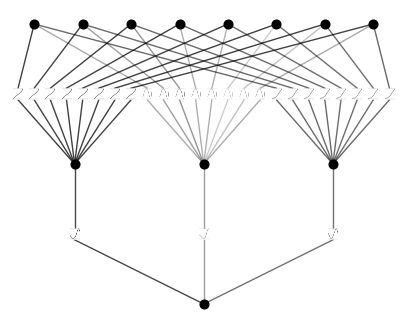

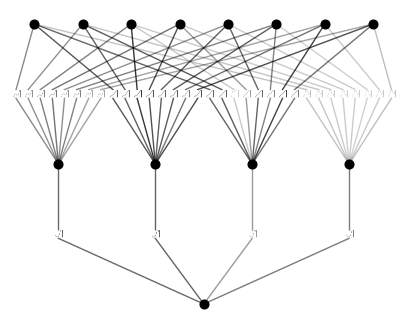

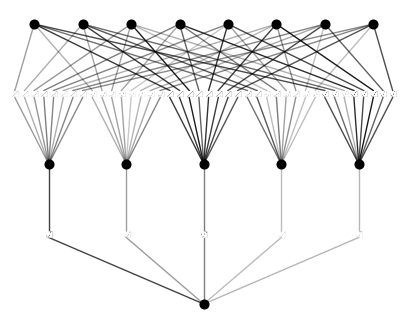

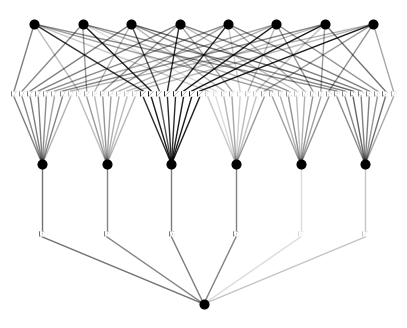

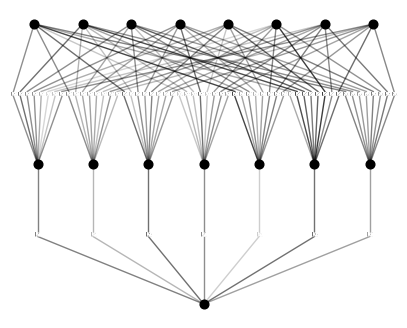

In [5]:
for n in range(1, TEST_N) :
    model = KAN(width=[1,n,8], grid=5, k=3)
    model.train(dataset, opt="LBFGS", steps=100)
    model.prune()
    model.plot(mask=True)

    models.append(model)

In [6]:
for n, model in enumerate(models) :
    for i in range(0, n + 2) :
        for j in range(0, n + 2) :
            for k in range(0, 8) :
                try :
                    model.fix_symbolic(i,j,k,'sin');
                except :
                    break

r2 is 0.9939156770706177
r2 is 0.9995790123939514
r2 is 0.999579131603241
r2 is 0.9995794296264648
r2 is 0.999579131603241
r2 is 0.9995793104171753
r2 is 0.9995791912078857
r2 is 0.9995793104171753
r2 is 0.9995794892311096
r2 is 0.9746739864349365
r2 is 0.9954665899276733
r2 is 0.9998544454574585
r2 is 0.9998610615730286
r2 is 0.9998471736907959
r2 is 0.9998574256896973
r2 is 0.9998564124107361
r2 is 0.9998506903648376
r2 is 0.9998592734336853
r2 is 0.999847948551178
r2 is 0.9909727573394775
r2 is 0.9910595417022705
r2 is 0.9908869862556458
r2 is 0.9910082817077637
r2 is 0.9909894466400146
r2 is 0.9909137487411499
r2 is 0.9910281300544739
r2 is 0.9909021258354187
r2 is 0.9796901345252991
r2 is 0.9510102868080139
r2 is 0.992912232875824
r2 is 0.9956902265548706
r2 is 0.9953945875167847
r2 is 0.995599627494812
r2 is 0.9955523610115051
r2 is 0.9957144856452942
r2 is 0.9948750734329224
r2 is 0.9953843951225281
r2 is 0.9959350824356079
r2 is 0.9259177446365356
r2 is 0.9283404350280762
r2 is

In [7]:
for model in models :
    pprint(model.symbolic_formula()[0])

[2.23 - 1.47*sin(0.83*sin(2.87*x_1 - 3.59) + 6.89),
 2.23 - 1.48*sin(0.83*sin(2.87*x_1 - 3.59) + 6.89),
 2.23 - 1.48*sin(0.83*sin(2.87*x_1 - 3.59) + 6.89),
 2.24 - 1.48*sin(0.83*sin(2.87*x_1 - 3.59) + 6.89),
 2.23 - 1.48*sin(0.83*sin(2.87*x_1 - 3.59) + 6.89),
 2.24 - 1.48*sin(0.83*sin(2.87*x_1 - 3.59) + 6.89),
 2.23 - 1.48*sin(0.83*sin(2.87*x_1 - 3.59) + 6.89),
 2.23 - 1.48*sin(0.83*sin(2.87*x_1 - 3.59) + 6.89)]
[0.28*sin(1.68*sin(2.13*x_1 - 0.8) - 0.e-2) - 0.91*sin(0.85*sin(2.96*x_1 - 9.81) + 6.63) + 1.87,
 0.28*sin(1.69*sin(2.13*x_1 - 0.8) - 0.e-2) - 0.92*sin(0.85*sin(2.96*x_1 - 9.81) + 6.63) + 1.87,
 0.28*sin(1.68*sin(2.13*x_1 - 0.8) - 0.e-2) - 0.92*sin(0.85*sin(2.96*x_1 - 9.81) + 6.63) + 1.87,
 0.28*sin(1.69*sin(2.13*x_1 - 0.8) - 0.e-2) - 0.92*sin(0.85*sin(2.96*x_1 - 9.81) + 6.63) + 1.87,
 -0.28*sin(1.69*sin(2.13*x_1 - 0.8) + 9.42) - 0.91*sin(0.85*sin(2.96*x_1 - 9.81) + 6.63) + 1.86,
 0.28*sin(1.68*sin(2.13*x_1 - 0.8) - 0.e-2) - 0.92*sin(0.85*sin(2.96*x_1 - 9.81) + 6.63) + 1.87,
 0

n = 1 model


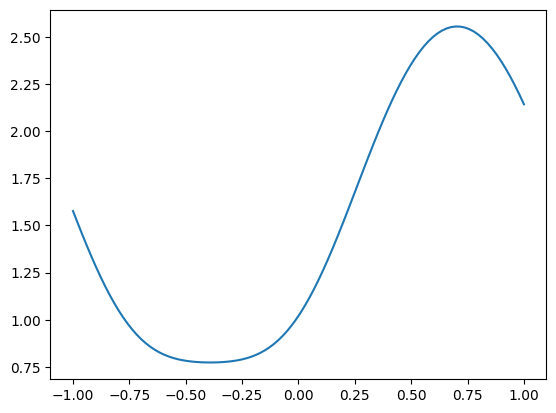

n = 2 model


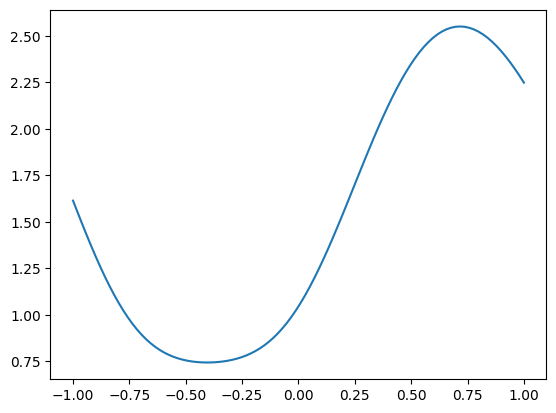

n = 3 model


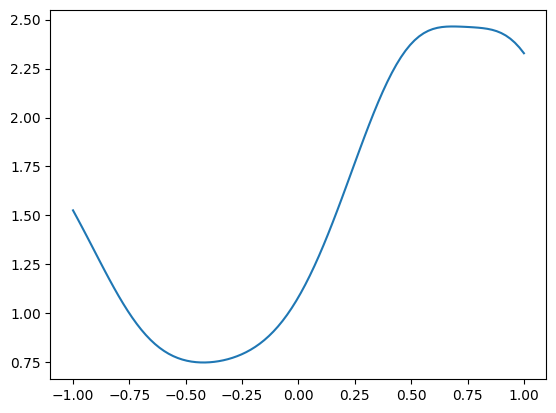

n = 4 model


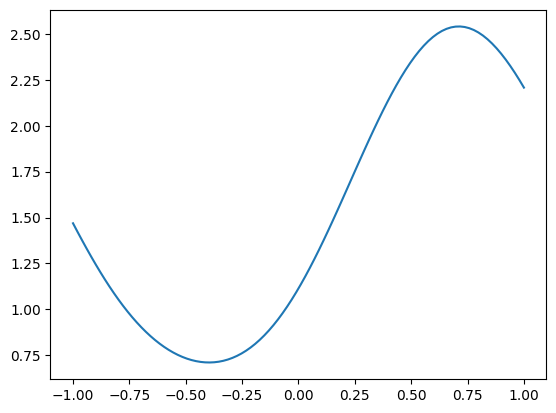

n = 5 model


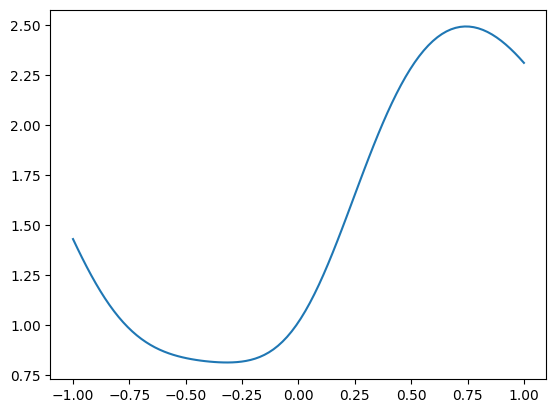

n = 6 model


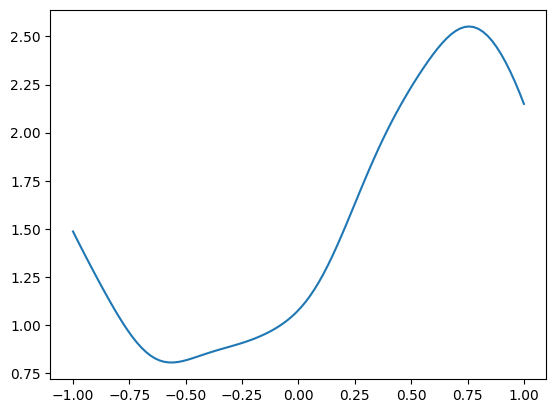

n = 7 model


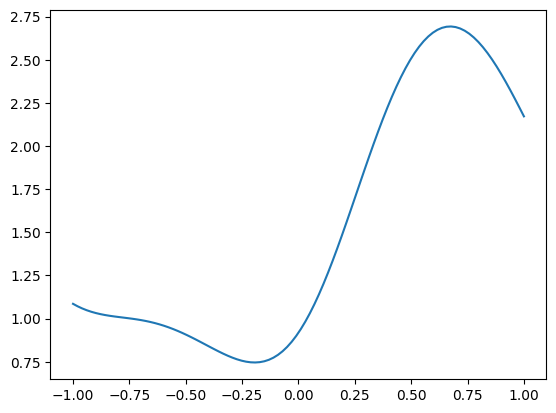

In [8]:
import numpy as np  
import matplotlib.pyplot as plt  
from numpy import sin, cos

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  
    
for n, model in enumerate(models) :
    def model_formula(x_1):
        return eval(str(model.symbolic_formula()[0][0]))
    print('n =', n + 1, 'model')
    graph(model_formula, np.linspace(-1,1,100))

Dataset


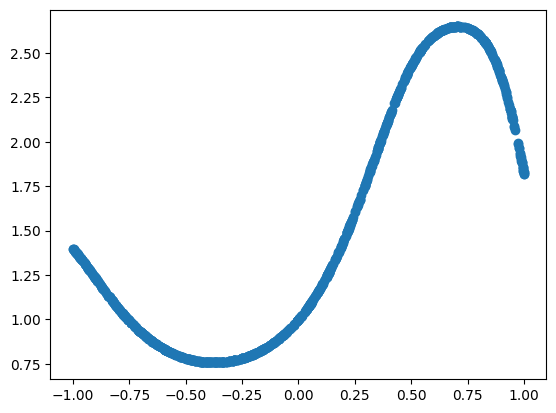

In [9]:
print('Dataset')
plt.scatter(dataset['train_input'], dataset['train_label'])
plt.show()  